<a href="https://colab.research.google.com/github/Ravina0007/Assignment/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 2

Variables in the dataset:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Correlation matrix:


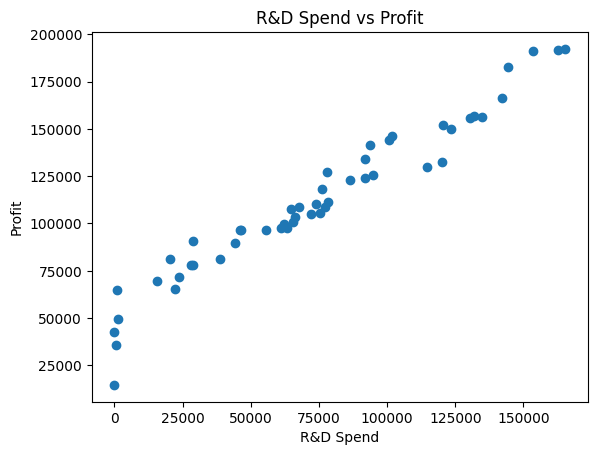

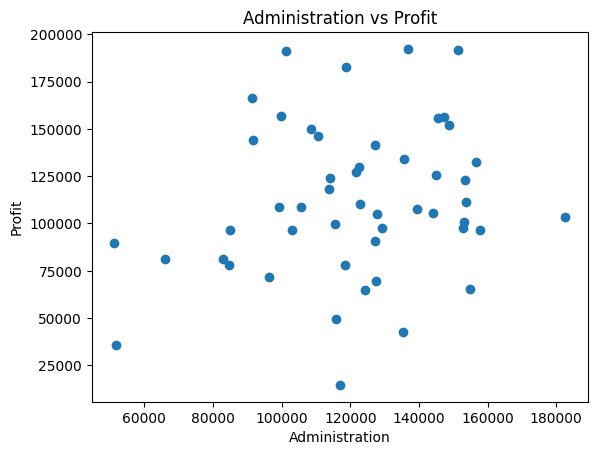

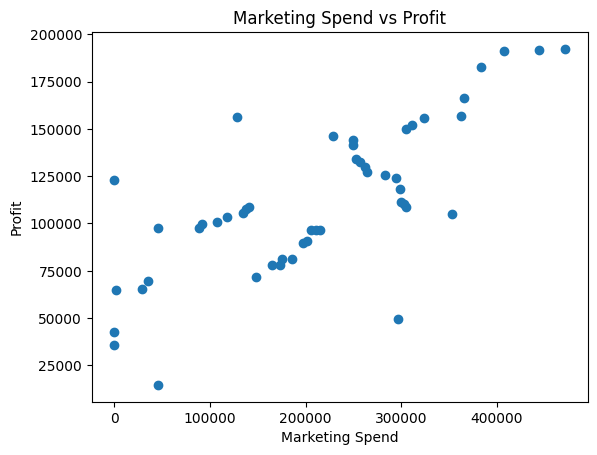


Training Data:
RMSE: 8938.01, R2: 0.95

Testing Data:
RMSE: 8995.91, R2: 0.90


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the dataset into a pandas dataframe
df = pd.read_csv('50_Startups.csv')

# Identify the variables in the dataset
print("Variables in the dataset:")
print(df.columns)

# Investigate the correlation between the variables
print("\nCorrelation matrix:")


# Choose appropriate variables to predict company profit
# In this case, we will choose all the variables except for the state
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

# Plot explanatory variables against profit
plt.scatter(X['R&D Spend'], y)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend vs Profit')
plt.show()

plt.scatter(X['Administration'], y)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()

plt.scatter(X['Marketing Spend'], y)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()

# Form training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# Compute RMSE and R2 values for training and testing data separately
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print the RMSE and R2 values
print("\nTraining Data:")
print(f"RMSE: {train_rmse:.2f}, R2: {train_r2:.2f}")

print("\nTesting Data:")
print(f"RMSE: {test_rmse:.2f}, R2: {test_r2:.2f}")

Exercise 3

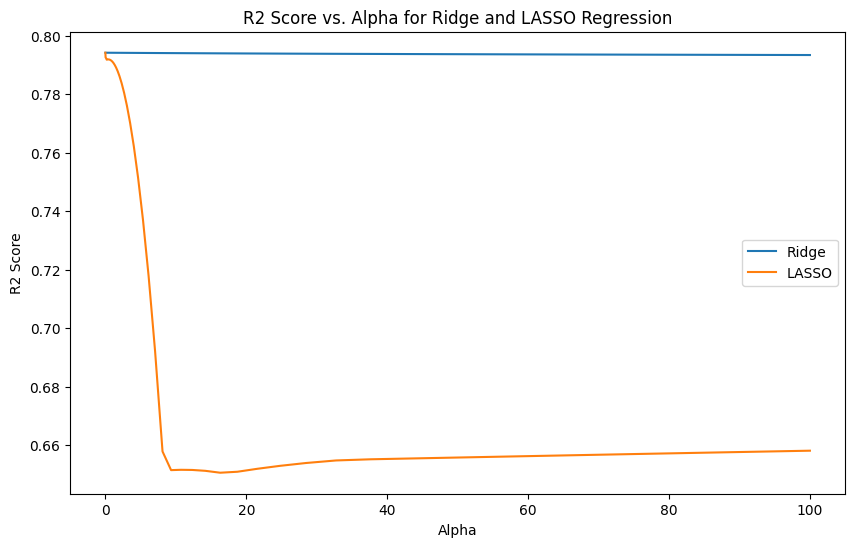

Best alpha for Ridge Regression: 0.0001
Best alpha for LASSO Regression: 0.0001


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# a) Read the data into a pandas DataFrame
data = pd.read_csv('Auto.csv')

# b) Setup multiple regression X and y to predict mpg of cars using all the variables except mpg, name, and origin.
data = data.replace('?', np.nan)  # Replace '?' with NaN
data = data.dropna()  # Drop rows with missing values
X = data.drop(['mpg', 'name', 'origin'], axis=1)
y = data['mpg']

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement both ridge regression and LASSO regression using several values for alpha
alphas = np.logspace(-4, 2, num=100)  # Range of alpha values to try

ridge_scores = []
lasso_scores = []

for alpha in alphas:
    # Ridge Regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_scores.append(r2_score(y_test, ridge_pred))

    # LASSO Regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_scores.append(r2_score(y_test, lasso_pred))

# e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_lasso_alpha = alphas[np.argmax(lasso_scores)]

# f) Plot the R2 scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_scores, label='Ridge')
plt.plot(alphas, lasso_scores, label='LASSO')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Alpha for Ridge and LASSO Regression')
plt.legend()
plt.show()

# g) Identify the value for alpha which gives the best score
print(f"Best alpha for Ridge Regression: {best_ridge_alpha}")
print(f"Best alpha for LASSO Regression: {best_lasso_alpha}")

Exercise 1 (Data(diabetes.csv') missing)

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data into a pandas DataFrame
data = pd.read_csv('diabetes.csv')

# Select the features and target variables
feature_columns = ['bmi', 's5', 'age']
target_column = 'progression'

if all(col in data.columns for col in feature_columns + [target_column]):
    features = data[feature_columns]
    target = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Model with just 'bmi' and 's5'
    model1 = LinearRegression()
    model1.fit(X_train[['bmi', 's5']], y_train)
    y_pred1 = model1.predict(X_test[['bmi', 's5']])
    r2_1 = r2_score(y_test, y_pred1)
    mse_1 = mean_squared_error(y_test, y_pred1)
    mae_1 = mean_absolute_error(y_test, y_pred1)

    # Model with 'bmi', 's5', and 'age'
    model2 = LinearRegression()
    model2.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    r2_2 = r2_score(y_test, y_pred2)
    mse_2 = mean_squared_error(y_test, y_pred2)
    mae_2 = mean_absolute_error(y_test, y_pred2)

    # Compare the metrics
    print("Model with 'bmi' and 's5':")
    print(f"R-squared: {r2_1:.4f}")
    print(f"MSE: {mse_1:.4f}")
    print(f"MAE: {mae_1:.4f}")

    print("\nModel with 'bmi', 's5', and 'age':")
    print(f"R-squared: {r2_2:.4f}")
    print(f"MSE: {mse_2:.4f}")
    print(f"MAE: {mae_2:.4f}")

else:
    print("One or more columns are missing in the dataset.")

One or more columns are missing in the dataset.
